### Cálculos con el Toy Model

In [1]:
using Plots, Symbolics
using LinearAlgebra

Comparado con el Toy model de las notas: a[1] = a, a[2] = b, a[3] = d/c, $\zeta = \zeta/e$, las ecuaciones quedan:

In [2]:
function F(u,p) 
    (χ,ζ,a,k,σ) = p
    return[χ[1]*(σ + k*a[1])*u[1] + χ[2]*k*a[2]*u[2] ; χ[3]*(σ + k*a[3])*u[2] + χ[2]*k*a[2]*u[1] - ζ*u[2]]
end

F (generic function with 1 method)

In [3]:

χ_n = [-1;1;-1]
ζ_n = 1
a_n = [1;1;2]
k_n = 1
σ_n = 1
p_n = (χ_n, ζ_n, a_n, k_n, σ_n)
F([1;2],p_n)

2-element Vector{Int64}:
  0
 -7

In [4]:
@variables us[1:2], χs[1:3], ζ, as[1:3], σ, k
ust = [us[i] for i ∈ 1:2]
χst = [χs[i] for i ∈ 1:3]
ast = [as[i] for i ∈ 1:3]
pst = (χst,ζ,ast,k,σ)
p = (χs,ζ,as,k,σ)
F(us,p)

2-element Vector{Num}:
           (σ + k*as[1])*us[1]*χs[1] + k*as[2]*us[2]*χs[2]
 (σ + k*as[3])*us[2]*χs[3] + k*as[2]*us[1]*χs[2] - ζ*us[2]

In [5]:
JF = Symbolics.jacobian(F(us,p),ust)

2×2 Matrix{Num}:
 (σ + k*as[1])*χs[1]            k*as[2]*χs[2]
       k*as[2]*χs[2]  (σ + k*as[3])*χs[3] - ζ

In [6]:
JF_exp = Symbolics.build_function(JF, us, p);
JFac = eval(JF_exp[1]);

In [7]:
@variables ζz, κ
K = simplify(expand(det(JF)))
KK = simplify(substitute(K, [ζ => ζz*χs[3], χs[2]*χs[2]=>κ*χs[1]*χs[3]])/χs[1]/χs[3])

σ^2 + k*σ*as[1] + k*σ*as[3] + (k^2)*as[1]*as[3] - ζz*σ - κ*(k^2)*(as[2]^2) - k*ζz*as[1]

In [8]:
Dσ = Differential(σ)

(::Differential) (generic function with 2 methods)

In [9]:
b = substitute(expand_derivatives(Dσ(KK)),[σ=>0])
c = substitute(KK,[σ=>0])

(k^2)*as[1]*as[3] - κ*(k^2)*(as[2]^2) - k*ζz*as[1]

In [10]:
σs = (-b + sqrt(b^2 - 4c))/2

0.5ζz + (1//2)*sqrt((k*as[1] + k*as[3] - ζz)^2 + 4.0κ*(k^2)*(as[2]^2) + 4.0k*ζz*as[1] - 4(k^2)*as[1]*as[3]) - (1//2)*k*as[1] - (1//2)*k*as[3]

**A partir de aquí la hice a mano, usando la estructura particular que tiene**

Supongo que se puede hacer más analíticamente pues es de la forma:

$$
\sigma_{\pm} = [-(a+d)k + i\zeta \pm \sqrt{((a-d)k - i\zeta)^2 + 4k^2\kappa b^2}]/2
$$

In [13]:
Sp(k,κ,a,ζ) = (-(a[1]+a[3])*k - im*ζ + sqrt(((a[1]-a[3])*k + im*ζ)^2 + 4κ*k^2*a[2]^2))/2

Sp (generic function with 1 method)

In [14]:
Sm(k,κ,a,ζ) = (-(a[1]+a[3])*k - im*ζ - sqrt(((a[1]-a[3])*k + im*ζ)^2 + 4κ*k^2*a[2]^2))/2

Sm (generic function with 1 method)

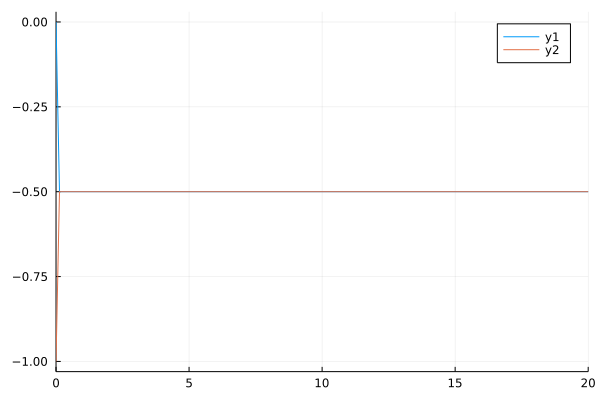

In [15]:
a = [1;2;1]
k = 1
ζ = 1
#plot(κ -> real(Sp(k,κ,a,ζ)), xlim=(0,20))
#plot!(κ -> real(Sm(k,κ,a,ζ)), xlim=(0,20))
plot(κ -> imag(Sp(k,κ,a,ζ)), xlim=(0,20))
plot!(κ -> imag(Sm(k,κ,a,ζ)), xlim=(0,20))

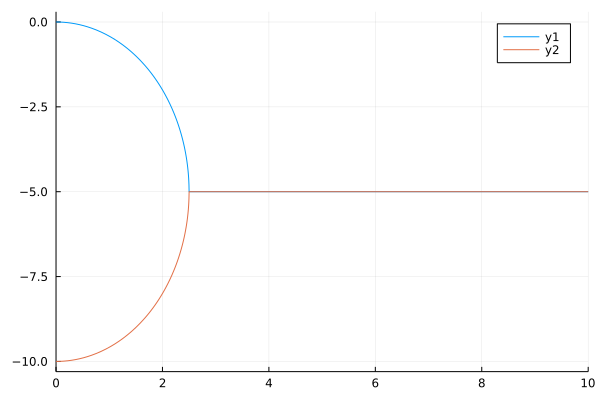

In [48]:
a = [1;2;1]
kl = 10
ζ = 10
κ = 1
#plot(κ -> real(Sp(k,κ,a,ζ)), xlim=(0,20))
#plot!(κ -> real(Sm(k,κ,a,ζ)), xlim=(0,20))
plot(k -> imag(Sp(k,κ,a,ζ)), xlim=(0,kl))
plot!(k -> imag(Sm(k,κ,a,ζ)), xlim=(0,kl))

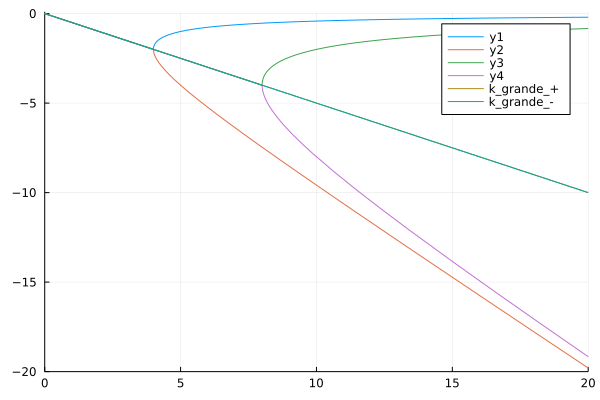

In [47]:
a = [1;2;1]
k = 1
ζ = 1
κ = 1
xl = 20
yl = 20
#plot(κ -> real(Sp(k,κ,a,ζ)), xlim=(0,20))
#plot!(κ -> real(Sm(k,κ,a,ζ)), xlim=(0,20))
plot(ζ -> imag(Sp(1,κ,a,ζ))
    , xlim=(0,xl)
    , ylim=(-yl,0.1))
plot!(ζ -> imag(Sm(1,κ,a,ζ)))
plot!(ζ -> imag(Sp(2,κ,a,ζ))
    , xlim=(0,50)
    )
plot!(ζ -> imag(Sm(2,κ,a,ζ)))
plot!(ζ -> imag(Sp(20,κ,a,ζ))
    , xlim=(0,xl)
    ,label="k_grande_+")
plot!(ζ -> imag(Sm(20,κ,a,ζ)), xlim=(0,xl),label="k_grande_-")

$$
\frac{u[2]}{u[1]} = \frac{ka_2\chi_1}{(i\zeta/\chi_2 - \sigma - ka_3)\chi_2}
$$

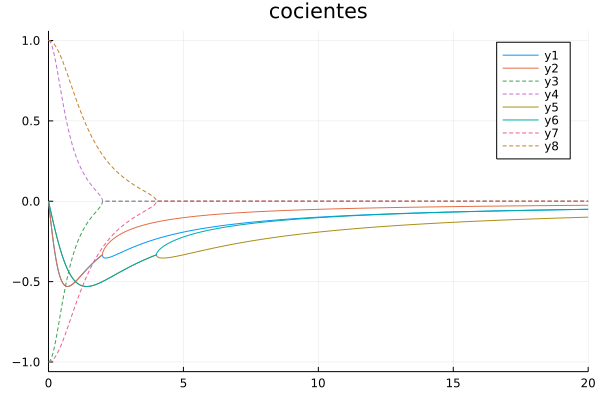

In [18]:
plot(title="cocientes")
a = [1;2;1]
k = 1
ζ = 1
κ = 1
for k in 0.5:0.5:1
plot!(ζ -> imag((k*a[2])/(im*ζ - Sp(k,κ,a,ζ) - k*a[3])), xlim=(0,20))
plot!(ζ -> imag((k*a[2])/(im*ζ - Sm(k,κ,a,ζ) - k*a[3])), xlim=(0,20))
plot!(ζ -> real((k*a[2])/(im*ζ - Sp(k,κ,a,ζ) - k*a[3])), xlim=(0,20), ls=:dash)
plot!(ζ -> real((k*a[2])/(im*ζ - Sm(k,κ,a,ζ) - k*a[3])), xlim=(0,20), ls=:dash)
end
plot!(lw=1)